## Health Insurance Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the mdeical insurance bill is affected by other variables such as Age, Sex, BMI, children, smoker and region.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
- The data consists of 7 column and 1338 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [42]:
df = pd.read_csv('data/insurance.csv')

#### Show Top 5 Records

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of the dataset

In [44]:
df.shape

(1338, 7)

### 2.2 Dataset information

- age: Age of primary beneficiary (int)

- sex: Gender of beneficiary (male, female)

- bmi: Body Mass Index, a measure of body fat based on height and weight (float)

- children: Number of children covered by health insurance (int)

- smoker: Smoking status of the beneficiary (yes, no)

- region: Residential region in the US (northeast, northwest, southeast, southwest)

- charges: Medical insurance cost billed to the beneficiary (float)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [45]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [55]:
# Print duplicated rows in the DataFrame
duplicate_mask = df.duplicated(keep=False)
print(df[duplicate_mask])

duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


#### There is 1 duplicate  values in the data set

In [54]:
df.drop_duplicates(inplace=True)
print("Duplicates removed.")

Duplicates removed.


In [56]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


### 3.3 Check data types

In [57]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [58]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [59]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Insight
- From above description of numerical data, the means are spread out for all the columns from 1.09 to 13279.12
- All standard deviations are also spread out - between 1.2 and 12110.36;

### 3.6 Exploring Data

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

# Check for NaN values in 'sex' column
nan_count = df['sex'].isna().sum()
print("Number of NaN values in 'sex':", nan_count)

print("Categories in 'region' variable:  ",end=" ")
print(df['region'].unique())

print("Categories in 'smoker' variable:",end=" " )
print(df['smoker'].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'region' variable:   ['southwest' 'southeast' 'northwest' 'northeast']
Categories in 'smoker' variable: ['yes' 'no']


In [62]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [63]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


['yes' 'no']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize charges to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

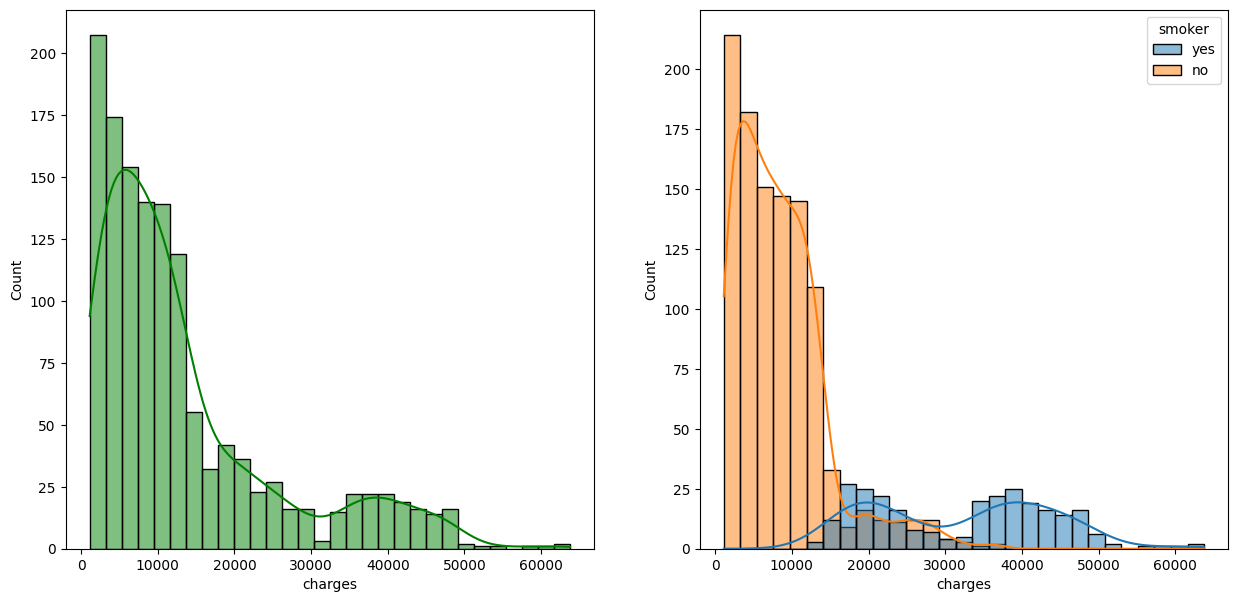

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='smoker')
plt.show()

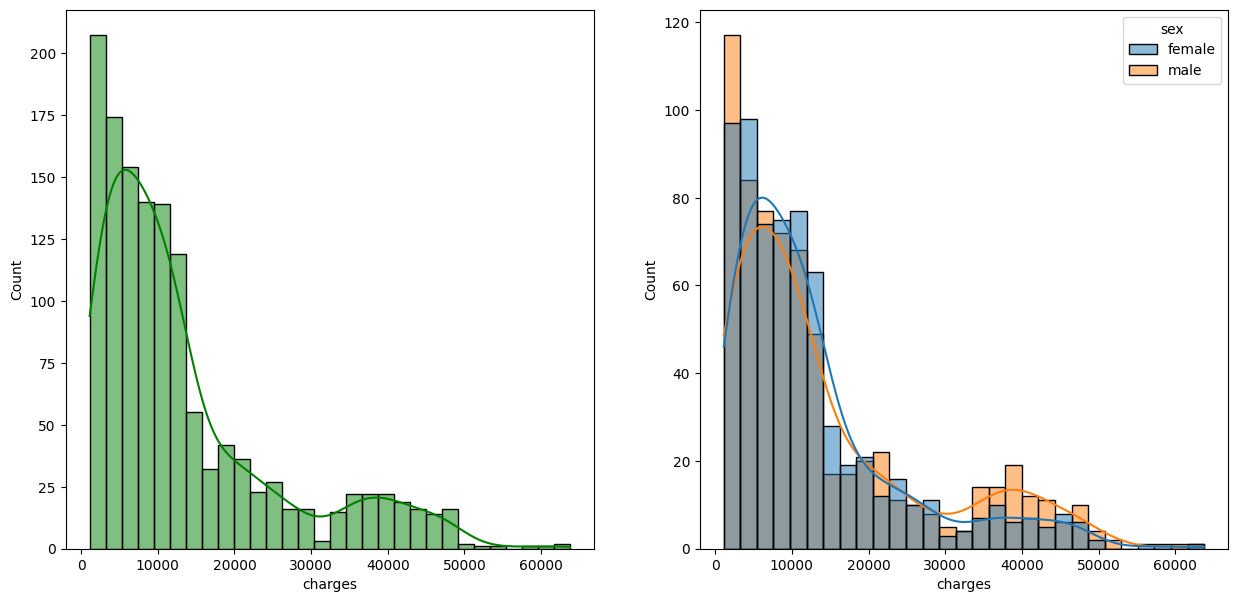

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

#####  Insights
- Smokers tend to have higher charges than non smokers.

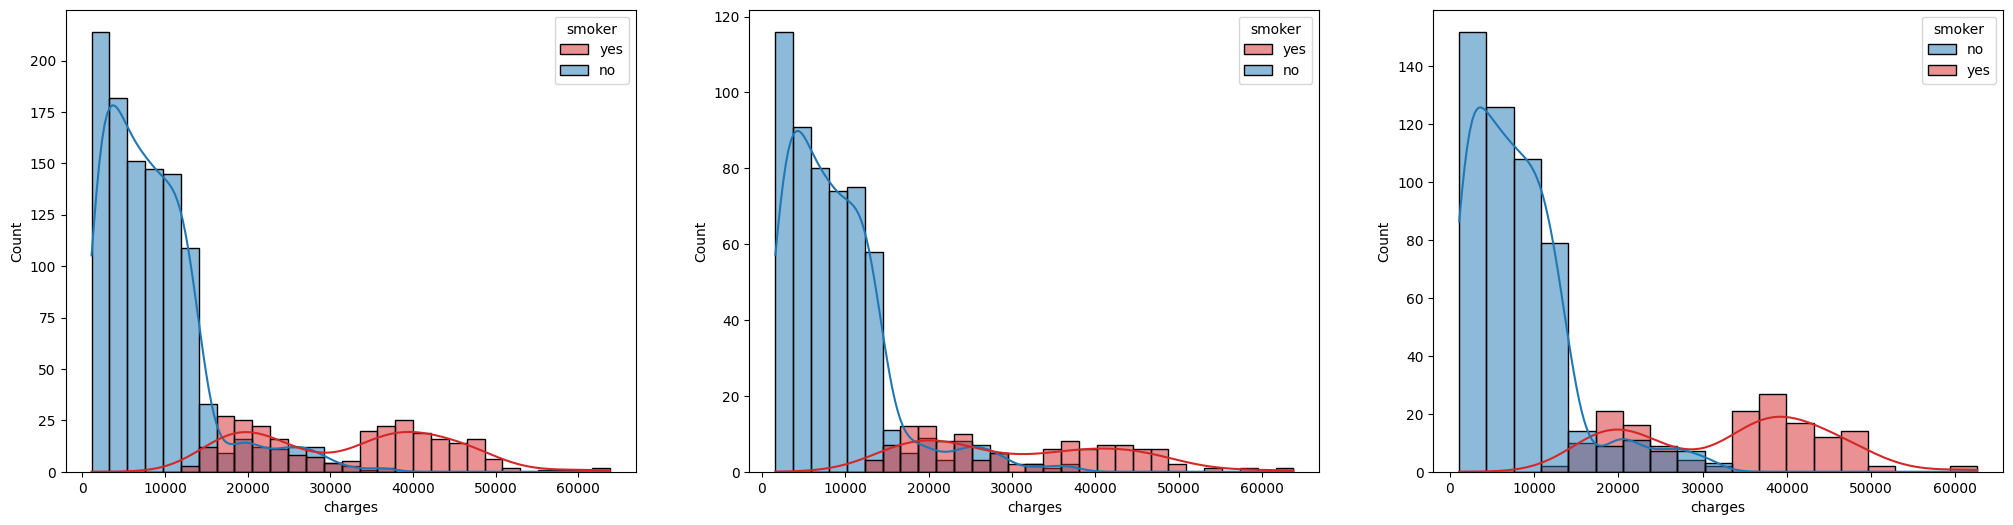

In [82]:
# Consistent color mapping for smoker status
smoker_palette = {"yes": "#d62728", "no": "#1f77b4"}  # red for yes, blue for no
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='charges', kde=True, hue='smoker', ax=axs[0], palette=smoker_palette)
sns.histplot(data=df[df.sex=='female'], x='charges', kde=True, hue='smoker', ax=axs[1], palette=smoker_palette)
sns.histplot(data=df[df.sex=='male'], x='charges', kde=True, hue='smoker', ax=axs[2], palette=smoker_palette)
plt.show()

#####  Insights
- Smokers have higher charges
- Smokers have higher charges be it a male or a female.

#### 4.2 Multivariate analysis using scatterplot

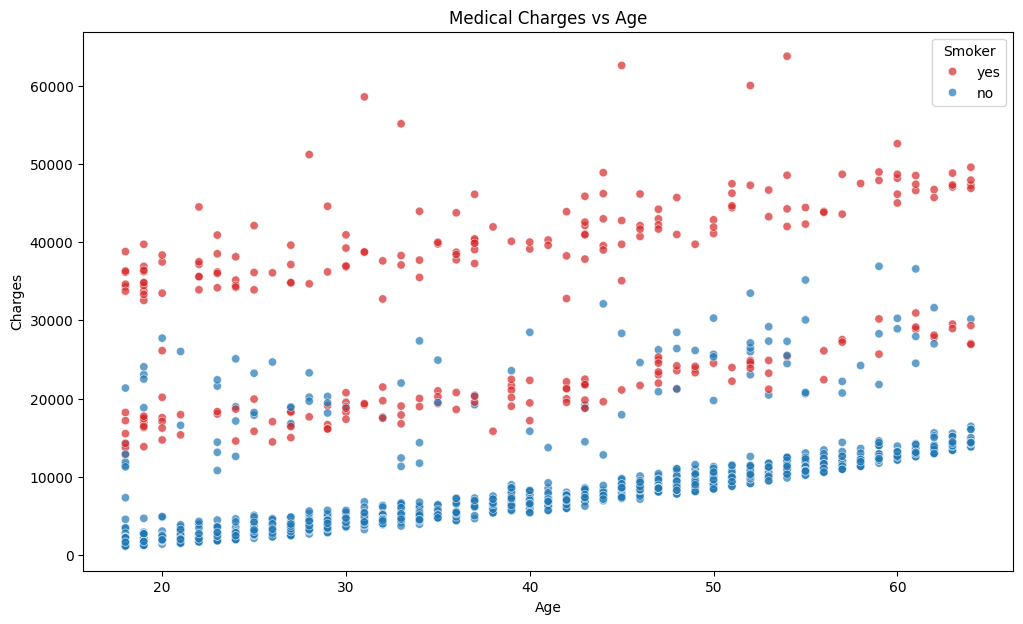

In [84]:
# Scatter plot: Charges vs Age, colored by smoker status
smoker_palette = {"yes": "#d62728", "no": "#1f77b4"}
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=smoker_palette, alpha=0.7)
plt.title('Medical Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

#####  Insights
- In general smokers have high charges
- The medical charges increase with age even for non smokers
- The medical charges are lesser for non smokers than smokers

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

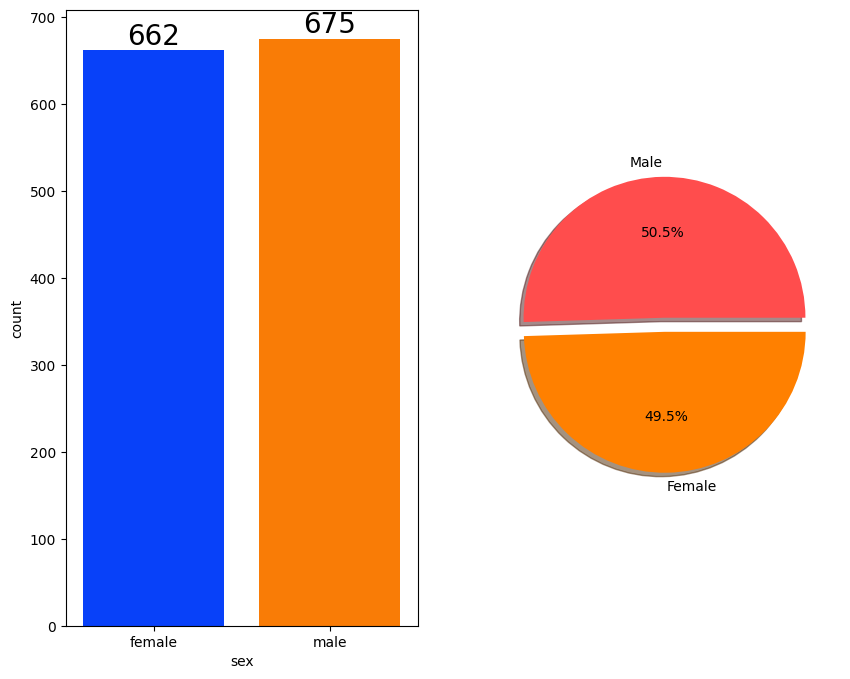

In [104]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female are 662 (49.5%) and male are 675 (50.5%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on medical charges ? ) 

In [88]:
# Group by sex and calculate mean only for numeric columns
gender_group = df.groupby('sex').mean(numeric_only=True)
gender_group

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


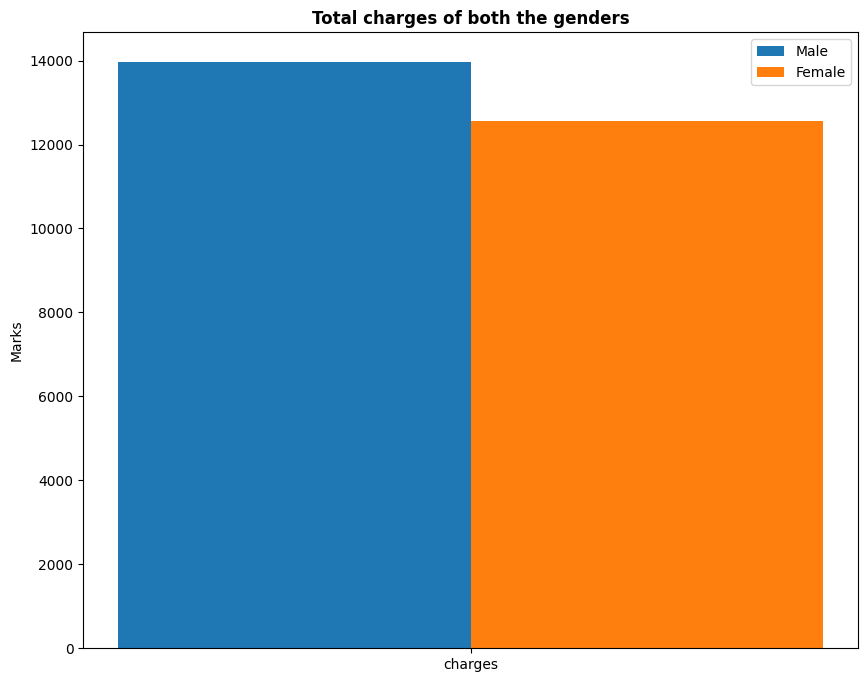

In [107]:
plt.figure(figsize=(10, 8))

X = ['charges']


female_scores = [gender_group['charges']['female']]
male_scores = [gender_group['charges']['male']]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total charges of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average males have a higher charge than females.

#### 4.4.2 AGE COLUMN
- How is Group wise distribution ?
- Does Age impact charges ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

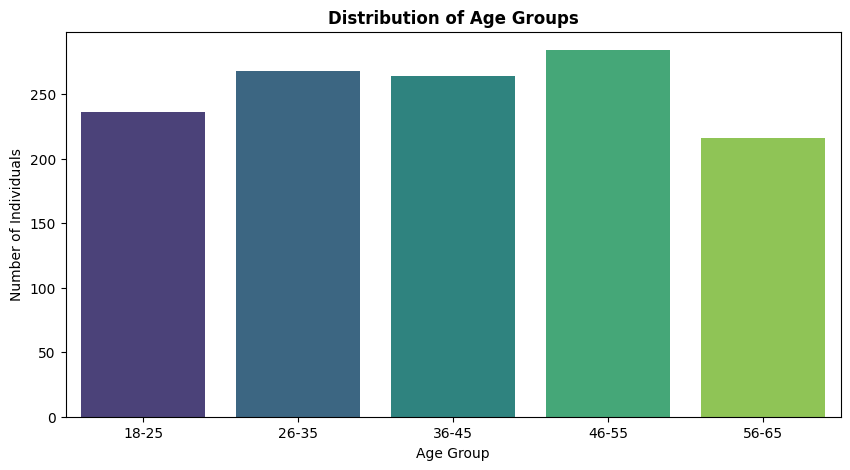

In [100]:
plt.subplots(figsize=(10,5))

age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

#print(df['age_group'].value_counts())

# Visualizing the distribution of age groups
sns.countplot(x='age_group', data=df, palette='viridis')
plt.title('Distribution of Age Groups', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.show()

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

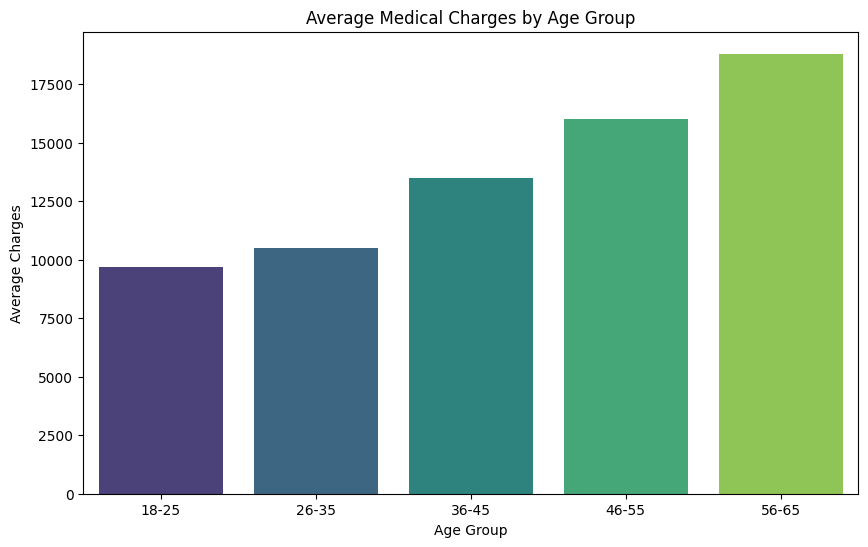

In [101]:
# Bar chart: Average charges by age bins

age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)
charges_by_age_group = df.groupby('age_group')['charges'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=charges_by_age_group.index, y=charges_by_age_group.values, palette='viridis')
plt.title('Average Medical Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()

#### Insights 
- Charges keep on increasing with rising age

#### 4.4.3 BMI COLUMN
- What is BMI for the dataset ?
- Does BMI impact charges ?

#### UNIVARIATE ANALYSIS ( What is the BMI ? )

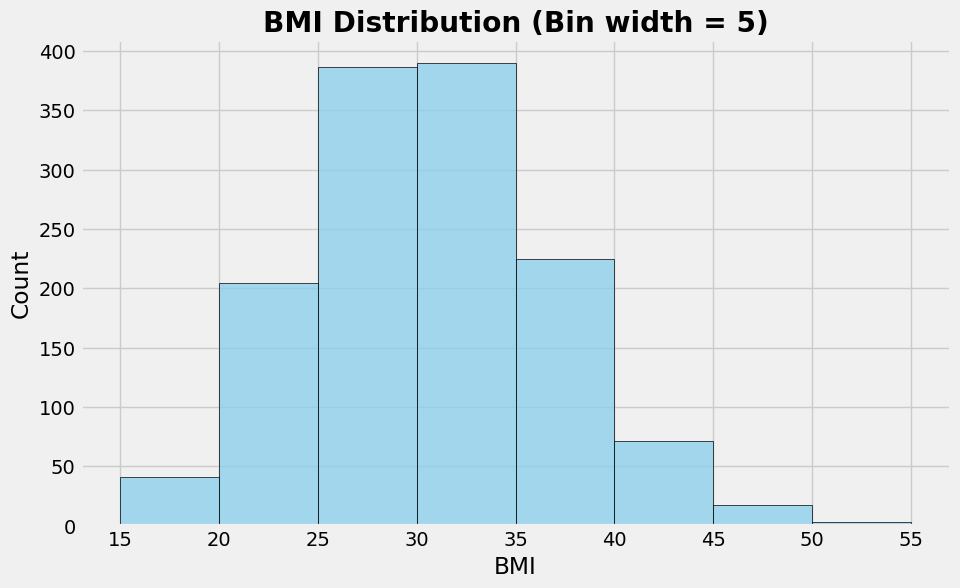

In [109]:
# Histogram for BMI with bins of 5
plt.figure(figsize=(10,6))
sns.histplot(df['bmi'], bins=range(int(df['bmi'].min()), int(df['bmi'].max()) + 5, 5), color='skyblue', edgecolor='black')
plt.title('BMI Distribution (Bin width = 5)', fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#### Insights 
- Largest number of people have BMI in the central part of 25-35. 

#### BIVARIATE ANALYSIS ( Does BMI impact charges ? )

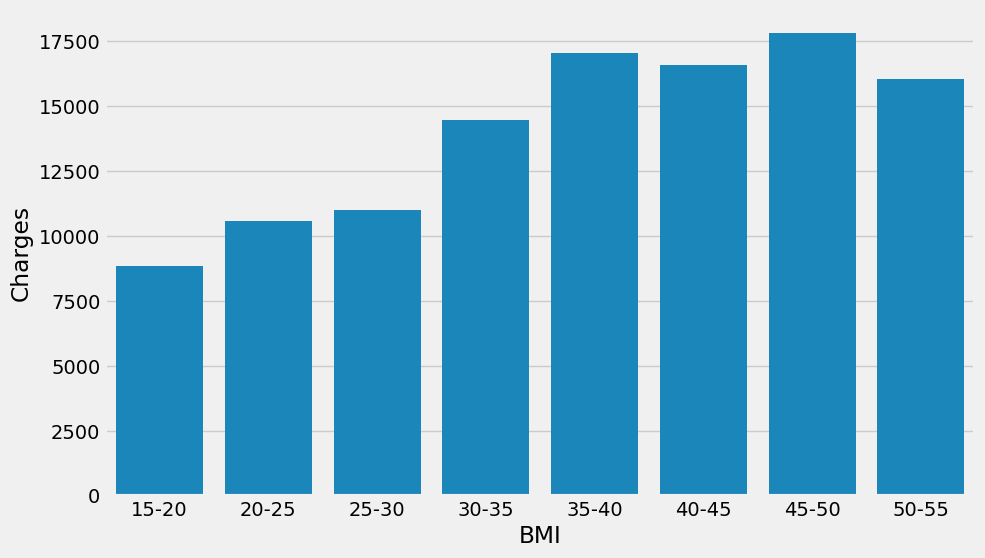

In [115]:
# Scatter plot: BMI vs Charges
plt.figure(figsize=(10,6))
bmi_bins=[15,20,25,30,35,40,45,50,55]
bmi_bins_label=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55']

df['bmi_group'] = pd.cut(df['bmi'],bmi_bins,labels=bmi_bins_label,right=True)
charges_by_bmi_group = df.groupby('bmi_group')['charges'].mean()

sns.barplot(x=charges_by_bmi_group.index,y=charges_by_bmi_group.values)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#### Insights 
- The charges generally increase with increase in age.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

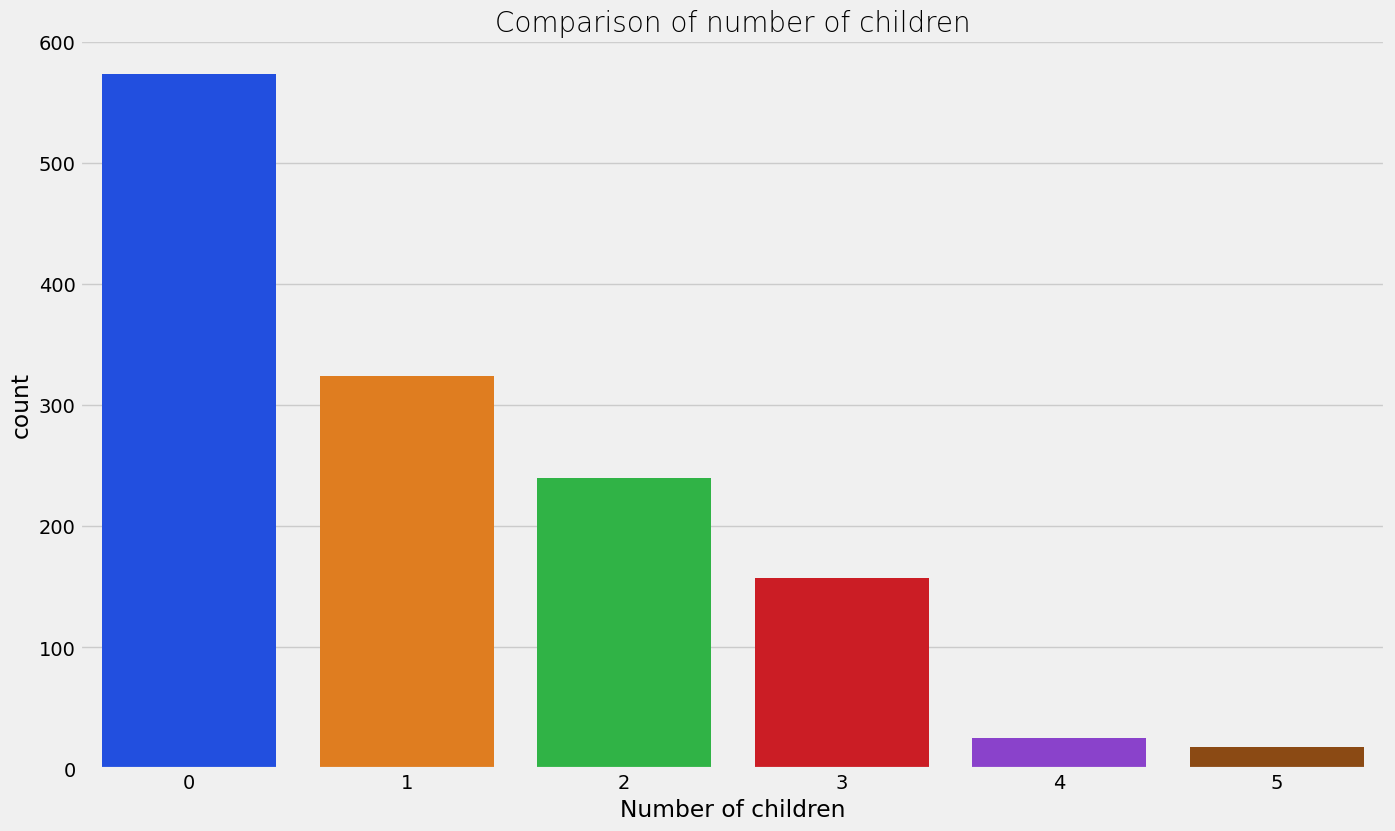

In [121]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data=df,x='children', palette = 'bright')
plt.title('Comparison of number of children', fontweight = 30, fontsize = 20)
plt.xlabel('Number of children')
plt.ylabel('count')
plt.show()

#### Insights 
- Maximum number of people have no children. The second highest is 1 child. 

#### BIVARIATE ANALYSIS (  Does number of children impact charges ? )

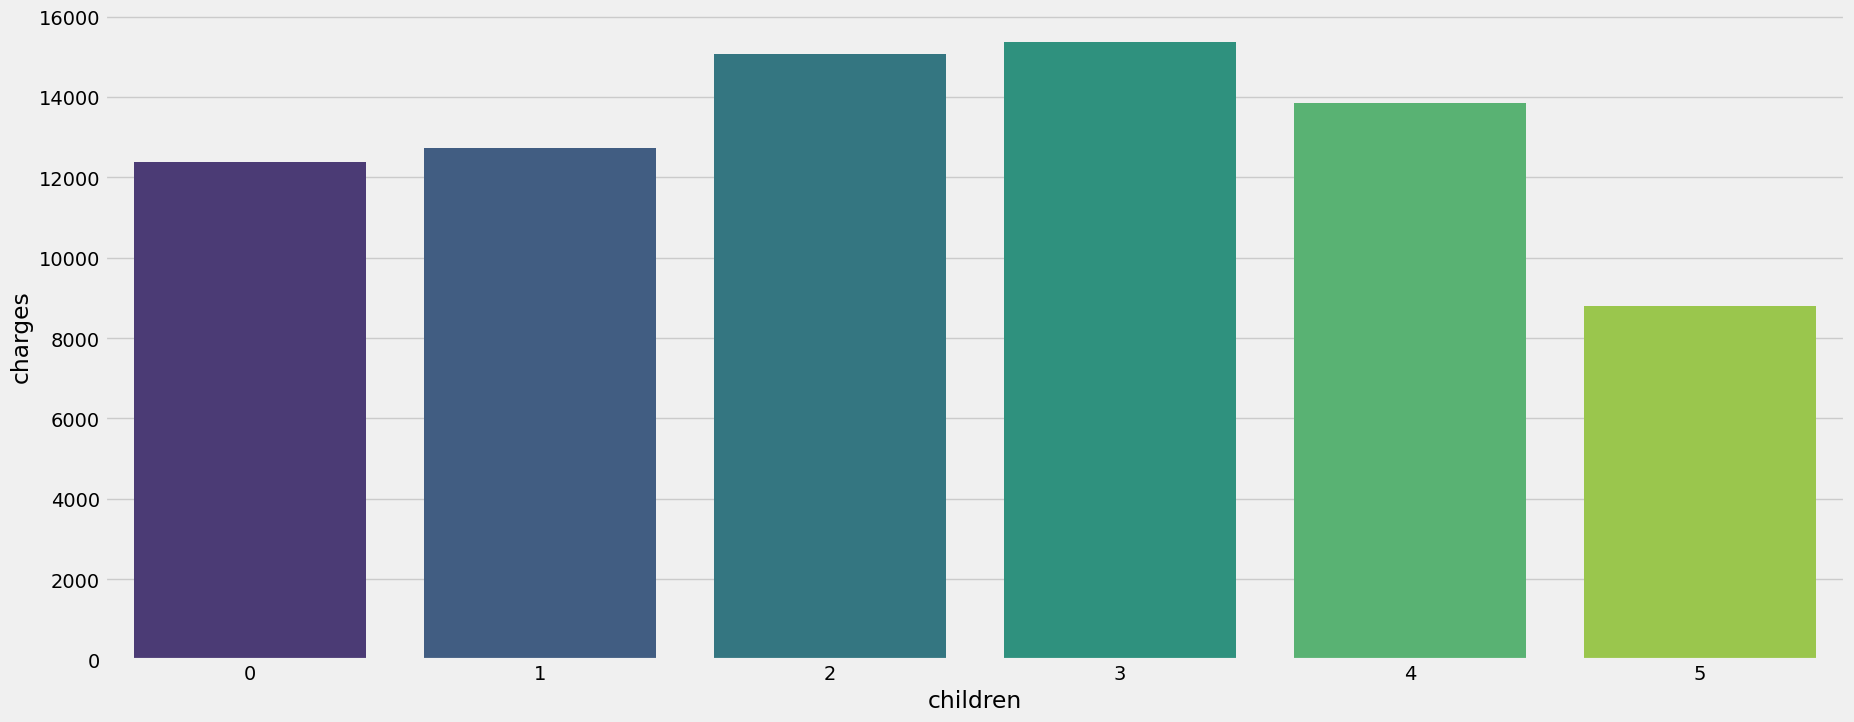

In [129]:
plt.subplots(figsize=(20,8))
sns.barplot(x=df['children'],y=df['charges'],palette='viridis',ci=None)
plt.show()

#### Insights 
- The charges tend to be highest for people with 3 children

#### 4.4.5 SMOKER COLUMN 
- What is the distribution of smokers and non-smokers ?
- Does smoking impact the charges?

#### UNIVARIATE ANALYSIS ( What is the distribution of smokers ?

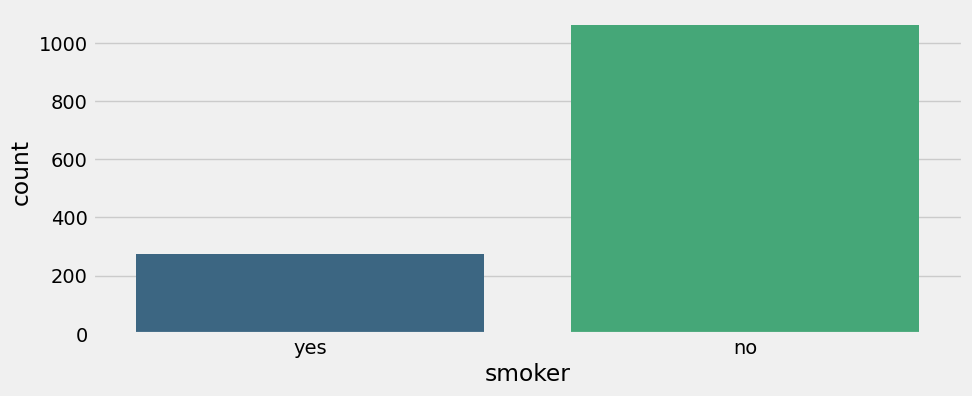

In [134]:
plt.figure(figsize=(10,4))
sns.countplot(x='smoker',data=df,palette='viridis')
plt.show()

#### Insights 
- There are more non smokers in the dataset than smokers by a huge number

#### BIVARIATE ANALYSIS ( Does smoking impact medical charges ? )

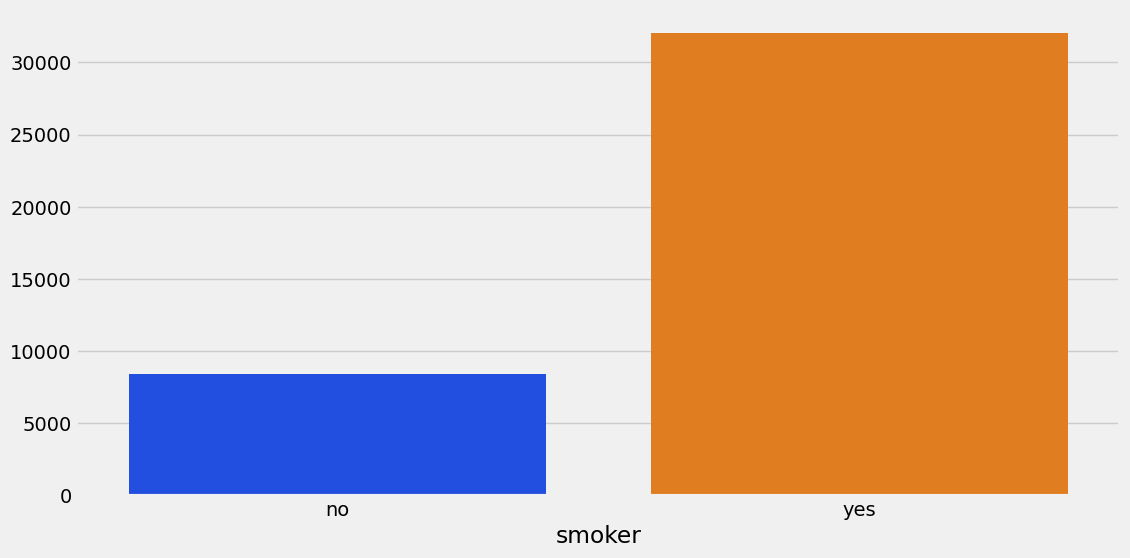

In [147]:
plt.figure(figsize=(12,6))
charges_smoker = df.groupby('smoker')['charges'].mean()
sns.barplot(x=charges_smoker.index, y=charges_smoker.values, palette='bright')
plt.show()

#### Insights  
- Smoking causes the charges to be high

#### 4.4.6 CHECKING OUTLIERS

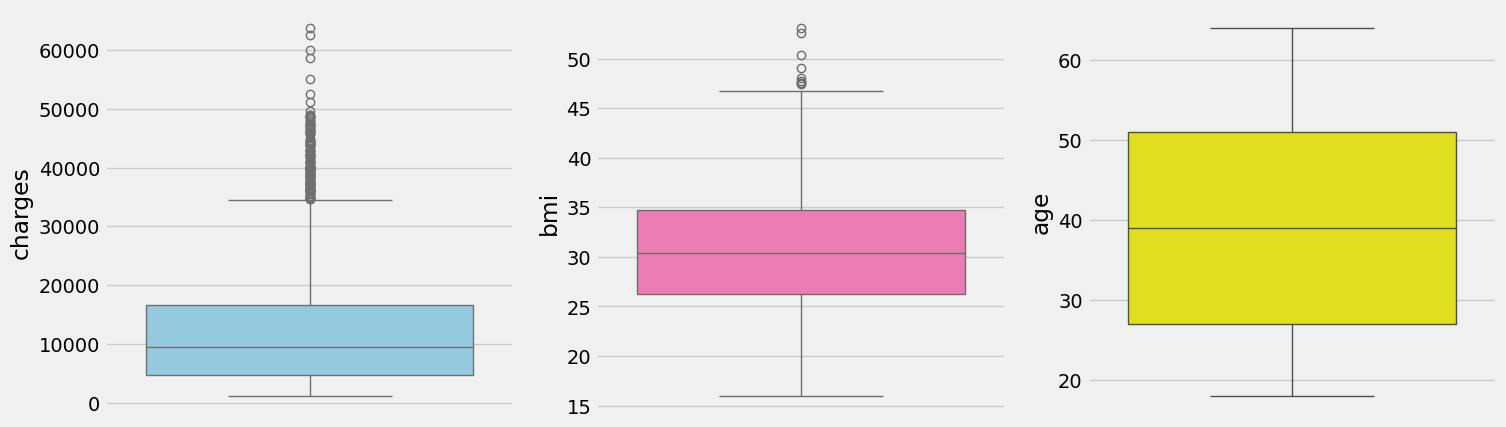

In [153]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(df['charges'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['bmi'],color='hotpink')
plt.subplot(133)
sns.boxplot(df['age'],color='yellow')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

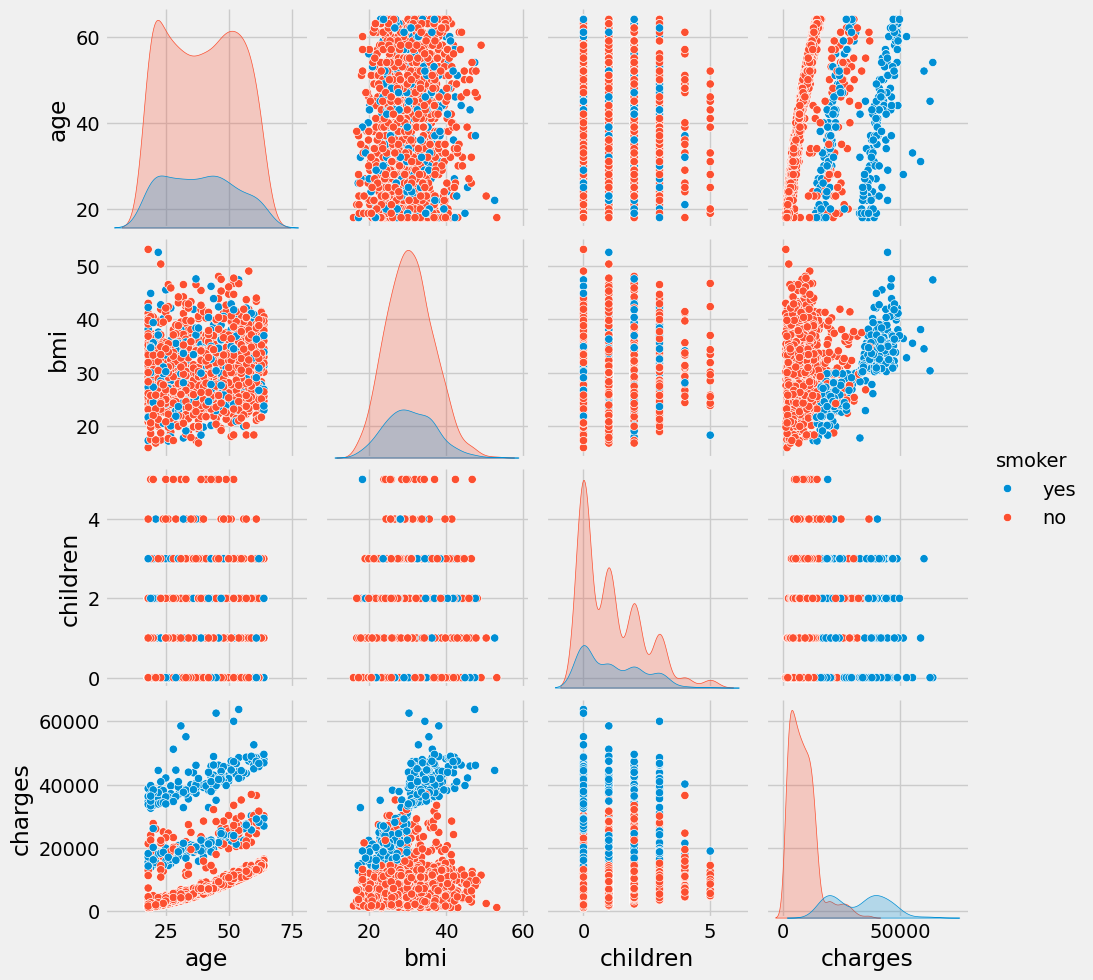

In [155]:
sns.pairplot(df,hue = 'smoker')
plt.show()

#### Insights
- From the above plot it is clear charges increase with factors such as smoking

### 5. Conclusions
- The total medical charges are dependent on age, smoking and BMI